In [1]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
import sklearn.datasets
wine = sklearn.datasets.load_wine()
wine.data.shape

(178, 13)

In [3]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    wine.data, 
    wine.target, 
    test_size=0.3, 
    shuffle=True)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [5]:
X_train.shape

torch.Size([124, 13])

In [6]:
class Net(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(Net, self).__init__()
        
        self.fc1 = torch.nn.Linear(13, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
net = Net(5)

In [7]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), 
                             lr=1.0e-3)

In [8]:
batch_size = 10

for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        pred = net.forward(x_batch) 
        
        loss_value = loss(pred, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_pred = net.forward(X_test)
        test_pred = test_pred.argmax(dim=1)
        print((test_pred == y_test).float().mean())

tensor(0.2407)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)
tensor(0.4074)


## 2 признака

In [17]:
class Net(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(Net, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
net = Net(5)

In [18]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), 
                             lr=1.0e-3)

In [19]:
batch_size = 10

for epoch in range(2000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        pred = net.forward(x_batch[:, :2]) 
        
        loss_value = loss(pred, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_pred = net.forward(X_test[:, :2])
        test_pred = test_pred.argmax(dim=1)
        print((test_pred == y_test).float().mean())

tensor(0.3519)
tensor(0.3889)
tensor(0.4630)
tensor(0.5000)
tensor(0.5000)
tensor(0.5000)
tensor(0.5185)
tensor(0.5185)
tensor(0.5741)
tensor(0.7222)
tensor(0.7963)
tensor(0.8333)
tensor(0.8519)
tensor(0.8333)
tensor(0.8519)
tensor(0.8333)
tensor(0.8148)
tensor(0.8333)
tensor(0.8333)
tensor(0.8519)


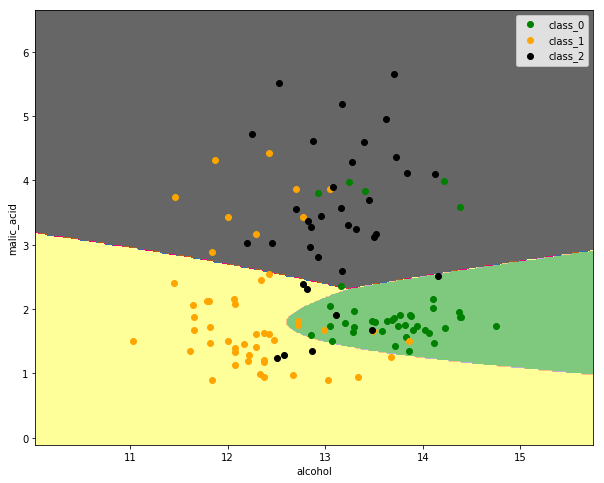

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

pred = net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = pred.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train[indexes, 0], 
                X_train[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

## 2 признака c PCA

In [27]:
from sklearn.decomposition import PCA

#### transform 13 features to 2 features by PCA

In [69]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca = torch.FloatTensor(X_train_pca)
X_test_pca = torch.FloatTensor(X_test_pca)

X_train_pca.shape, X_test_pca.shape

(torch.Size([124, 2]), torch.Size([54, 2]))

In [70]:
class Net(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(Net, self).__init__()
        
        self.fc1 = torch.nn.Linear(2, n_hidden_neurons)
        self.act1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.act2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(n_hidden_neurons, 3)
        self.sm = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x

    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
net = Net(5)

In [71]:
loss = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(net.parameters(), 
                             lr=1.0e-3)

In [72]:
batch_size = 10

for epoch in range(2000):
    order = np.random.permutation(len(X_train_pca))
    for start_index in range(0, len(X_train_pca), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        x_batch = X_train_pca[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        pred = net.forward(x_batch) 
        
        loss_value = loss(pred, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    if epoch % 100 == 0:
        test_pred = net.forward(X_test_pca)
        test_pred = test_pred.argmax(dim=1)
        print((test_pred == y_test).float().mean())

tensor(0.2407)
tensor(0.7222)
tensor(0.7222)
tensor(0.7222)
tensor(0.7222)
tensor(0.7407)
tensor(0.7407)
tensor(0.7407)
tensor(0.7037)
tensor(0.7037)
tensor(0.7037)
tensor(0.7222)
tensor(0.7407)
tensor(0.7593)
tensor(0.7593)
tensor(0.7407)
tensor(0.7407)
tensor(0.7407)
tensor(0.7407)
tensor(0.7407)


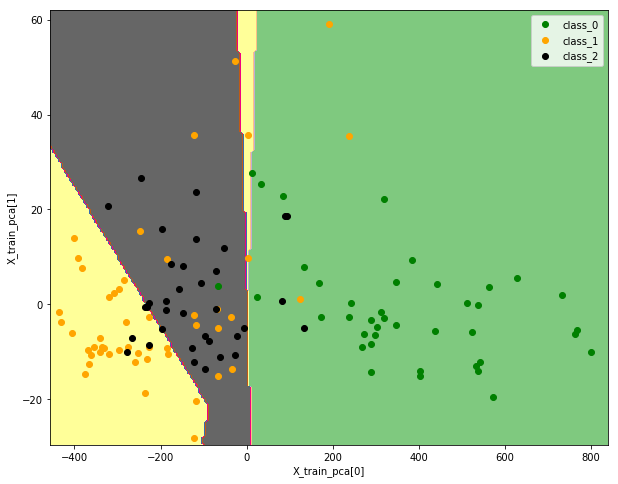

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
steps = 200

x_min, x_max = X_train_pca[:, 0].min() * 1.05, X_train_pca[:, 0].max() * 1.05
y_min, y_max = X_train_pca[:, 1].min() * 1.05, X_train_pca[:, 1].max() * 1.05

xx, yy =  torch.meshgrid(torch.linspace(x_min, x_max, steps),
                         torch.linspace(y_min, y_max, steps))

pred = net.inference(torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = pred.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(X_train_pca[indexes, 0], 
                X_train_pca[indexes, 1], 
                c=color, 
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel("X_train_pca[0]")
    plt.ylabel("X_train_pca[1]")
    plt.legend()